In [2]:
import pandas as pd
df = pd.read_csv('Customer_Churn.csv')
df.head()



,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,DSL,500.5,500.5,No
1,5575-GNVDE,Male,0,No,No,34,Yes,Fiber optic,650.4,2210.6,Yes
2,3668-QPYBK,Male,0,No,No,2,Yes,DSL,450.3,900.6,No
3,7795-CFOCW,Female,0,No,No,45,No,No,0.0,0.0,No
4,9237-HQITU,Female,0,No,No,2,Yes,Fiber optic,750.0,1500.0,Yes


In [3]:
# Shape of the dataset (rows, columns)
print("Shape of dataset:", df.shape)

# Dataset info (data types + non-null values)
print("\nDataset Info:")
print(df.info())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Shape of dataset: (10, 11)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customerID       10 non-null     object 
 1   gender           10 non-null     object 
 2   SeniorCitizen    10 non-null     int64  
 3   Partner          10 non-null     object 
 4   Dependents       10 non-null     object 
 5   tenure           10 non-null     int64  
 6   PhoneService     10 non-null     object 
 7   InternetService  10 non-null     object 
 8   MonthlyCharges   10 non-null     float64
 9   TotalCharges     10 non-null     float64
 10  Churn            10 non-null     object 
dtypes: float64(2), int64(2), object(7)
memory usage: 1012.0+ bytes
None

Missing Values:
customerID         0
gender             0
SeniorCitizen      0
Partner            0
Dependents         0
tenure             0
PhoneService       0
InternetService    0


In [4]:
# Statistical summary of numerical columns
print("\nSummary Statistics:")
print(df.describe())

# Churn class distribution
print("\nChurn Value Counts:")
print(df['Churn'].value_counts())



Summary Statistics:
       SeniorCitizen     tenure  MonthlyCharges  TotalCharges
count      10.000000  10.000000       10.000000     10.000000
mean        0.100000  21.400000      557.200000   9984.310000
std         0.316228  20.780333      233.463392  15711.206843
min         0.000000   1.000000        0.000000      0.000000
25%         0.000000   3.500000      485.500000   1050.450000
50%         0.000000  16.000000      580.250000   3145.700000
75%         0.000000  32.500000      720.150000  12586.250000
max         1.000000  62.000000      810.000000  50220.000000

Churn Value Counts:
Churn
No     7
Yes    3
Name: count, dtype: int64


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar chart of churn distribution
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()


ModuleNotFoundError: No module named 'seaborn'

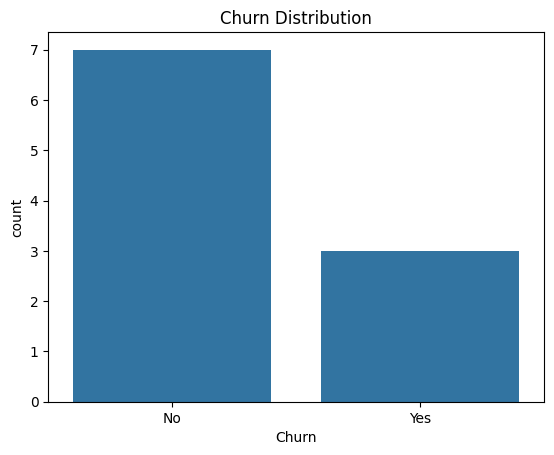

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar chart of churn distribution
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()


In [7]:
# Check unique values in categorical columns
for col in df.columns:
    if df[col].dtype == 'object':
        print(f"{col}: {df[col].unique()}")


customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' '7795-CFOCW' '9237-HQITU'
 '9305-CDSKC' '1452-KIOVK' '6713-OKOMC' '7892-YOIIN' '6388-TABGU']
gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
Churn: ['No' 'Yes']


In [8]:
# Convert 'TotalCharges' to numeric (force errors to NaN)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check for null values again
print(df.isnull().sum())


customerID         0
gender             0
SeniorCitizen      0
Partner            0
Dependents         0
tenure             0
PhoneService       0
InternetService    0
MonthlyCharges     0
TotalCharges       0
Churn              0
dtype: int64


In [9]:
# Fill missing 'TotalCharges' with median value
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


C:\Users\Prana\AppData\Local\Temp\ipykernel_25576\2065018368.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


In [11]:
from sklearn.preprocessing import LabelEncoder

# Label encode 'gender', 'Partner', 'Dependents', 'PhoneService', 'Churn'
le = LabelEncoder()
for col in ['gender', 'Partner', 'Dependents', 'PhoneService', 'Churn']:
    df[col] = le.fit_transform(df[col])

# One-hot encode 'InternetService'
df = pd.get_dummies(df, columns=['InternetService'], drop_first=True)

# Check data again
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,0,0,1,0,1,0,500.5,500.5,0,False,False
1,5575-GNVDE,1,0,0,0,34,1,650.4,2210.6,1,True,False
2,3668-QPYBK,1,0,0,0,2,1,450.3,900.6,0,False,False
3,7795-CFOCW,0,0,0,0,45,0,0.0,0.0,0,False,True
4,9237-HQITU,0,0,0,0,2,1,750.0,1500.0,1,True,False


In [12]:
# Features and target
X = df.drop(['customerID', 'Churn'], axis=1)
y = df['Churn']

# Check shapes
print("Features shape:", X.shape)
print("Target shape:", y.shape)


Features shape: (10, 10)
Target shape: (10,)


In [13]:
from sklearn.model_selection import train_test_split

# 70% train, 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Training set:", X_train.shape)
print("Testing set:", X_test.shape)


Training set: (7, 10)
Testing set: (3, 10)


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create and train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


In [15]:
# Accuracy score
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 1.0

Confusion Matrix:
[[2 0]
 [0 1]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [16]:
from sklearn.ensemble import RandomForestClassifier

# Create and train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)


In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Accuracy score
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

# Confusion Matrix
print("\nRandom Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

# Classification Report
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 1.0

Random Forest Confusion Matrix:
[[2 0]
 [0 1]]

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [18]:
from xgboost import XGBClassifier

# Create and train XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)


c:\Users\Prana\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:45:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Accuracy score
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))

# Confusion Matrix
print("\nXGBoost Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))

# Classification Report
print("\nXGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))


XGBoost Accuracy: 0.6666666666666666

XGBoost Confusion Matrix:
[[2 0]
 [1 0]]

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       0.00      0.00      0.00         1

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3



c:\Users\Prana\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Prana\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Prana\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave